<a href="https://colab.research.google.com/github/Yatharth19/ML/blob/main/medical_cost_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
gender_le=LabelEncoder()
df['gender_le']=gender_le.fit_transform(df['sex'])

In [ ]:
smoker_le=LabelEncoder()
df['smoker_le']=smoker_le.fit_transform(df['smoker'])

In [ ]:
region_le=LabelEncoder()
df['region_le']=region_le.fit_transform(df['region'])

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,gender_le,smoker_le,region_le
1333,50,male,30.97,3,no,northwest,10600.5483,1,0,1
1334,18,female,31.92,0,no,northeast,2205.9808,0,0,0
1335,18,female,36.85,0,no,southeast,1629.8335,0,0,2
1336,21,female,25.80,0,no,southwest,2007.9450,0,0,3
1337,61,female,29.07,0,yes,northwest,29141.3603,0,1,1


In [ ]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [ ]:
df.head()

,age,bmi,children,charges,gender_le,smoker_le,region_le
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


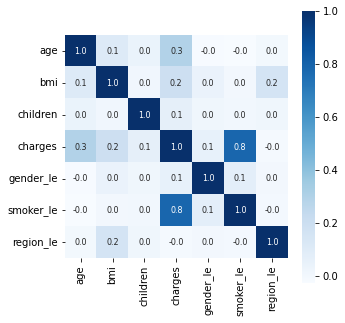

In [ ]:
correlation=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
X=df.drop(['region_le','charges'],axis=1)
y=df['charges']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
error=metrics.r2_score(Y_test,y_predicted)
print(error)

0.7428803779811104


In [ ]:
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_predicted2=model2.predict(X_test)

In [ ]:
error2=metrics.r2_score(Y_test,y_predicted2)
print(error2)

0.8242066576667055


In [ ]:
model.score(X_test,Y_test)

0.7428803779811104

In [ ]:
model2.score(X_test,Y_test)

0.8242066576667055

In [ ]:
model.score(X_train,Y_train)

0.7511416233816596

In [ ]:
model2.score(X_train,Y_train)

0.9765583381533829

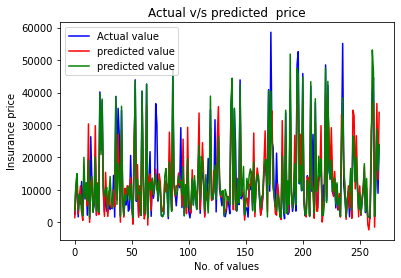

In [ ]:
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(y_predicted,color='red',label='predicted value')
plt.plot(y_predicted2,color='green',label='predicted value')
plt.title("Actual v/s predicted  price")
plt.xlabel('No. of values')
plt.ylabel('Insurance price')
plt.legend()
plt.show()